In [ ]:
!pip install mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install libarchive

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached libarchive-0.4.7.tar.gz (23 kB)
  Preparing metadata (setup.py) ... done
  Using cached nose-1.3.7-py3-none-any.whl (154 kB)
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for libarchive
  Running setup.py clean for libarchive
Failed to build libarchive
ERROR: Could not build wheels for libarchive, which is required to install pyproject.toml-based projects


In [ ]:
import pandas as pd
import yfinance as yfin
import math
from pandas_datareader import data as pdr
yfin.pdr_override()
import numpy as np
import matplotlib.pyplot as plt
import mplfinance as mplf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM

# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dropout, Dense

# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dropout, Dense, Bidirectional



from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Bidirectional
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dropout, Dense

In [ ]:
# df =pd.read_csv('BTC-USD.csv')
df = pdr.get_data_yahoo('GOLD', start='2012-01-01', end='2019-12-17')
print(df)

[*********************100%***********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2012-01-03  46.270000  47.770000  46.200001  47.509998  39.010563   9010200
2012-01-04  47.480000  48.490002  47.330002  48.220001  39.593548   8905400
2012-01-05  47.720001  48.520000  47.419998  48.020000  39.429325   5800800
2012-01-06  48.299999  48.299999  47.270000  47.540001  39.035187   4527100
2012-01-09  47.720001  48.029999  47.250000  47.709999  39.174782   3958600
...               ...        ...        ...        ...        ...       ...
2019-12-10  16.950001  17.170000  16.920000  17.139999  15.611188  12644500
2019-12-11  17.280001  17.780001  17.240000  17.620001  16.048374  14640500
2019-12-12  17.799999  17.980000  17.340000  17.559999  15.993721  12194100
2019-12-13  17.450001  17.670000  17.320000  17.580000  16.011944  10721200
2019-12-16  17.6800

/usr/local/lib/python3.10/dist-packages/mplfinance/_arg_validators.py:83: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


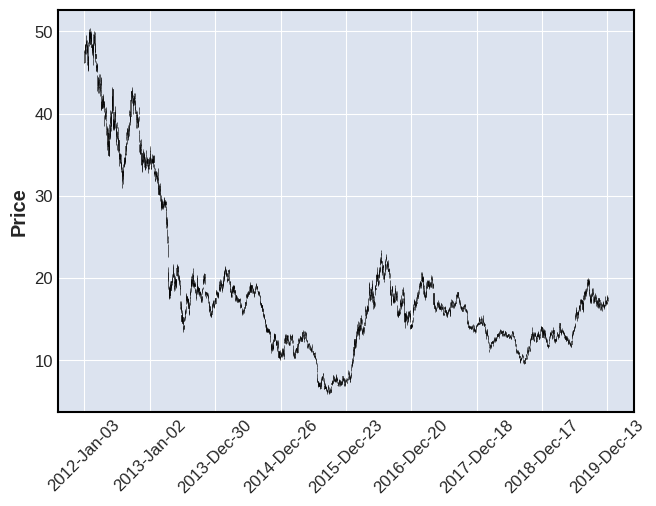

In [ ]:
# plt.figure(figsize=(16,8))
# plt.title('close price history')
# plt.plot(df['Close'])
mplf.plot(df,type='candle')
# plt.xlabel('Date',fontsize  =18)
# plt.ylabel('Close price VSD($)',fontsize  =18)

In [ ]:
# creat the 'Close Cloumn'
data=df.filter(['Close'])

# convert to numpy
dataset=data.values

# the number of rows to be trained
training_data_len= math.ceil(len(dataset)*.8)
training_data_len

1602

In [ ]:
#scale the data
scalar=MinMaxScaler(feature_range=(0,1))
scaled_data=scalar.fit_transform(dataset)


In [ ]:
#creat scaled data for training
train_data=scaled_data[0:training_data_len,:]

#split data to x_train , y_test 
x_train=[]
y_train=[]
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=60:
    print(x_train)
    print(y_train)
    print()



[array([0.9471405 , 0.96331737, 0.95876051, 0.94782409, 0.95169736,
       0.96582365, 0.97584868, 0.97676007, 0.96605146, 0.95830481,
       0.95716562, 0.92321707, 0.90886307, 0.93438139, 0.90088854,
       0.96764634, 0.97789927, 0.99270897, 0.98519021, 0.98701291,
       0.98701291, 1.        , 0.98268393, 0.98496232, 0.9874686 ,
       0.98268393, 0.98108905, 0.96172248, 0.95898831, 0.94941898,
       0.94531781, 0.96217809, 0.93620408, 0.96855773, 0.99111408,
       0.99430394, 0.97789927, 0.96992473, 0.99156977, 0.95215306,
       0.9592162 , 0.94508992, 0.93005233, 0.9065846 , 0.90817948,
       0.91387554, 0.90840738, 0.90430621, 0.89792656, 0.8516746 ,
       0.86375021, 0.86602869, 0.85896555, 0.86238322, 0.85873774,
       0.84620643, 0.86169963, 0.8783322 , 0.86261102, 0.84780132])]
[0.8473456256059263]



In [ ]:
#convert the x_train,y_train to numpy arrays
x_train,y_train=np.array(x_train),np.array(y_train)


In [ ]:
#reshape the data
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1542, 60, 1)

In [ ]:
# #build the LSTM model 
# model=Sequential()
# model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
# model.add(LSTM(50,return_sequences=False))
# model.add(Dense(25))
# model.add(Dense(1))



# model = Sequential()
# model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
# model.add(Dropout(0.2))  # Add dropout layer with a dropout rate of 0.2
# model.add(LSTM(50, return_sequences=False))
# model.add(Dense(25))
# model.add(Dense(1))





# model = Sequential()
# model.add(LSTM(64, return_sequences=True, input_shape=(x_train.shape[1], 1)))
# model.add(Dropout(0.2))
# model.add(LSTM(64, return_sequences=True))
# model.add(Dropout(0.2))
# model.add(LSTM(64))
# model.add(Dropout(0.2))
# model.add(Dense(25))
# model.add(Dense(1))
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dropout, Dense

# model = Sequential()
# model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
# model.add(Dropout(0.2))
# model.add(LSTM(128, return_sequences=True))
# model.add(Dropout(0.2))
# model.add(LSTM(128))
# model.add(Dropout(0.2))
# model.add(Dense(64))
# model.add(Dense(1))




# model = Sequential()
# model.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=(x_train.shape[1], 1)))
# model.add(Dropout(0.2))
# model.add(Bidirectional(LSTM(64, return_sequences=True)))
# model.add(Dropout(0.2))
# model.add(Bidirectional(LSTM(64)))
# model.add(Dropout(0.2))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(1))



model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.3))
model.add(LSTM(64,return_sequences=False))
model.add(Dropout(0.3))
# model.add(Dense(26, activation='relu'))
model.add(Dense(26, activation='sigmoid'))

model.add(Dense(1))




In [ ]:
#compile the model 
model.compile(optimizer='adam',loss='mean_squared_error')


In [ ]:
#train the model 
model.fit(x_train,y_train,batch_size=1,epochs=1)

1542/1542 [==============================] - 37s 22ms/step - loss: 0.0042


In [ ]:
# Creating the testing dataset

test_data=scaled_data[training_data_len-60:,:]
print(len(test_data))
x_test=[] 
y_test=dataset[training_data_len:,:]
print(len(test_data))
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])

460
460


In [ ]:
#convert x_test to numpy arrays
x_test=np.array(x_test)


In [ ]:
# Reshape x_test

x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [ ]:
# Prediction
predictions=model.predict(x_test)
predictions=scalar.inverse_transform(predictions)

13/13 [==============================] - 1s 11ms/step


In [ ]:
# The root mean squared error
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse




0.20477032899856568

<ipython-input-25-fdc3346cace9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


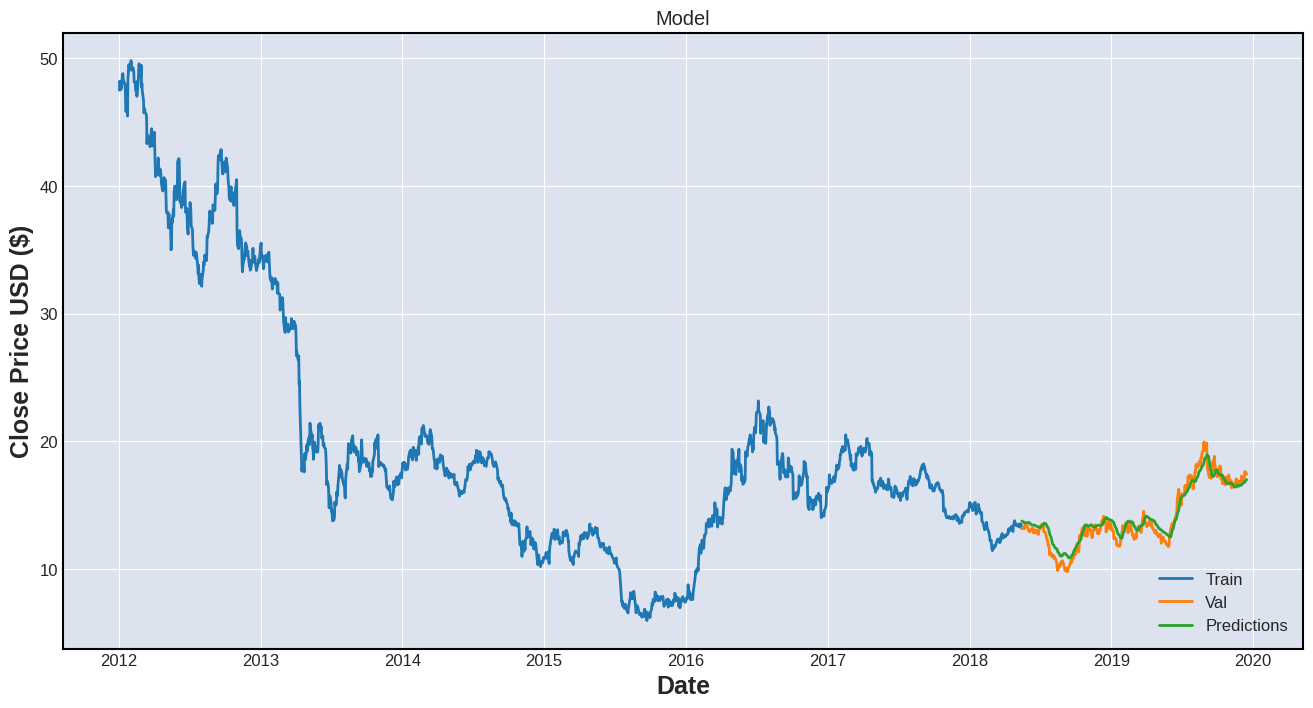

In [ ]:
#Plot the data

train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)' , fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()


In [ ]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2018-05-16,13.200000,13.748783
2018-05-17,13.190000,13.723852
2018-05-18,13.160000,13.694345
2018-05-21,13.200000,13.662120
2018-05-22,13.120000,13.633060
...,...,...
2019-12-10,17.139999,16.760406
2019-12-11,17.620001,16.783360
2019-12-12,17.559999,16.839632


In [ ]:
btc = pdr.get_data_yahoo('GOLD', start='2012-01-01', end='2019-12-17')

# Create a new data frame
new_df=btc.filter(['Close'])


# Get the last 60 day Closing price values and convert the dataframe to an array

last_60_days=new_df[-60:].values


# Scale the data to be values between 0 and 1

last_60_days_scaled=scalar.transform(last_60_days)
  
# Create an empty list

X_test=[]

X_test.append(last_60_days_scaled)

# Convert the numpy array

X_test=np.array(X_test)

# Reshape the data
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

pred_price=model.predict(X_test)

# Get the predicted scalar price
pred_price=scalar.inverse_transform(pred_price)
print(pred_price)



[*********************100%***********************]  1 of 1 completed
1/1 [==============================] - 0s 20ms/step
[[17.048346]]


In [ ]:
btc_2= pdr.get_data_yahoo('GOLD', start='2019-12-17', end='2019-12-20')
print(btc_2['Close'])

[*********************100%***********************]  1 of 1 completed
Date
2019-12-17    17.389999
2019-12-18    17.930000
2019-12-19    17.709999
Name: Close, dtype: float64


In [21]:
#Data generation
import yfinance as yfin
yfin.pdr_override()
from pandas_datareader import data as pdr
import numpy as np
import matplotlib.pyplot as plt

df = pdr.get_data_yahoo('BTC-USD', start='2012-01-01', end='2019-12-17')


[*********************100%***********************]  1 of 1 completed


In [22]:
#Creat a function for calculation Moving Average(MA)
def MA(data,period=30,column=30):
  return data[column].rolling(window=period).mean()

In [23]:
# Create a function for calculation Exponential Moving Average(EMA)
def EMA(data,period=30,column='Close'):
  return data[column].ewm(span=period).mean()


In [24]:
# Ensure the column exists in the DataFrame
column_label = 'Close'  # Modify this based on the column label you want to use
df['MA20'] = MA(df, 20, column_label)
df['MA50'] = MA(df, 50, column_label)


In [25]:
# Create two new columns for storing the 20 day and 50 day MA
df['EMA20']=EMA(df,20)
df['EMA50']=EMA(df,50)

In [26]:
#Get the buy and sell signals 
df['signal']=np.where(df['MA20']>df['MA50'],1,0)
df['position']=df['signal'].diff()

df['Buy']=np.where(df['position']==1,df['Close'],np.NAN)
df['Sell']=np.where(df['position']==-1,df['Close'],np.NAN)

In [27]:
#Get the buy and sell signals 
df['signal']=np.where(df['EMA20']>df['EMA50'],1,0)
df['position']=df['signal'].diff()

df['Buy']=np.where(df['position']==1,df['Close'],np.NAN)
df['Sell']=np.where(df['position']==-1,df['Close'],np.NAN)

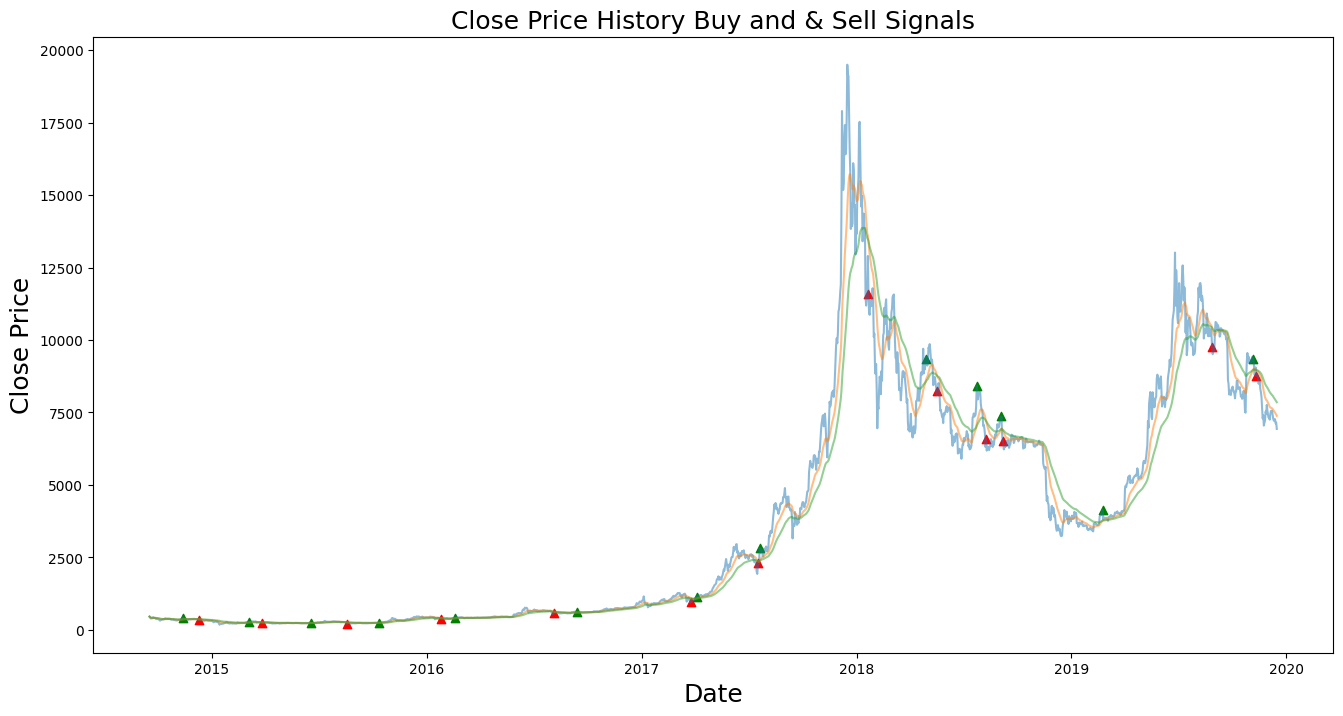

In [28]:
#Show the Close price with the MA ,WMA,EMA and Buy and Sell signals
plt.figure(figsize=(16,8))
plt.title('Close Price History Buy and & Sell Signals' , fontsize=18)
plt.plot(df['Close'], alpha=0.5 , label='Close')
# plt.plot(df['MA20'], alpha=0.5 , label='MA20')
# plt.plot(df['MA50'], alpha=0.5 , label='MA50')
plt.plot(df['EMA20'], alpha=0.5 , label='EMA20')
plt.plot(df['EMA50'], alpha=0.5 , label='EMA50')


plt.scatter(df.index,df['Buy'], alpha=1, label='Buy Signal', marker='^',color='green')

plt.scatter(df.index,df['Sell'], alpha=1, label='Sell Signal', marker='^',color='red')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price',fontsize=18)
plt.show()